In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler

In [ ]:
# Loading the dataset into pandas
df_input = pd.read_csv('Churn_DIC.csv')
df_input.shape

df_input

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


---

# **Cleaning**

---

# **1. Changing datatype**

In [ ]:
df_input['tenure'] = df_input['tenure'].astype(float)
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  float64
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


# **2. Removing Duplicates**

In [ ]:
# Remove duplicates for customer_id column
df = df_input.drop_duplicates(subset=['customer_id'])

# **3. One-Hot Encoding**

In [ ]:
# One-Hot Encoding done for columns 'country' and 'gender'
df_1 = pd.get_dummies(df, columns=['country'])
df_2 = pd.get_dummies(df_1, columns=['gender'])
df = df_2
df

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5.0,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,15569892,516,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,15584532,709,36,7.0,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,15682355,772,42,3.0,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# **4. Renaming Features**

In [ ]:
# Renaming Columns

col_rename = {'country_France': 'France', 'country_Germany': 'Germany', 'country_Spain' : 'Spain', 'gender_Male' : 'Male', 'gender_Female' : 'Female'}

df.rename(columns= col_rename, inplace=True)

df


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male
0,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5.0,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,15569892,516,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,15584532,709,36,7.0,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,15682355,772,42,3.0,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# **5. Dropping Unwanted Features**

In [ ]:
# Dropping Columns

df = df.drop(['customer_id'], axis=1)


# **6. Removing Customers with 0 balance**

In [ ]:
df = df.dropna()
df = df[df['balance'] != 0]
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,0,1,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,53,4.0,88381.21,1,1,0,69384.71,1,1,0,0,1,0
9993,644,28,7.0,155060.41,1,1,0,29179.52,0,1,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# **7. Categorizing credit_score**

In [ ]:
bins = [0, 649, 719, float('inf')]
labels = ['Bad', 'Fair', 'Good']

df['Credit_Category'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=False)
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male,Credit_Category
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0,Bad
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0,Bad
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0,Good
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,0,1,0,1,Bad
7,376,29,4.0,115046.74,4,1,0,119346.88,1,0,1,0,1,0,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,53,4.0,88381.21,1,1,0,69384.71,1,1,0,0,1,0,Bad
9993,644,28,7.0,155060.41,1,1,0,29179.52,0,1,0,0,0,1,Bad
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0,0,1,Bad
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,0,1,0,0,1,Good


# **8. Adding New Calculated Features**

Introduced the column 'ratio' that indicates balance:salary ratio. This may give an idea about the financial stability of a person

In [ ]:
df['ratio'] = df['balance'] / df['estimated_salary']
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male,Credit_Category,ratio
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0,Bad,0.744677
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0,Bad,1.401375
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0,Good,1.587055
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,0,1,0,1,Bad,0.759604
7,376,29,4.0,115046.74,4,1,0,119346.88,1,0,1,0,1,0,Bad,0.963969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,53,4.0,88381.21,1,1,0,69384.71,1,1,0,0,1,0,Bad,1.273785
9993,644,28,7.0,155060.41,1,1,0,29179.52,0,1,0,0,0,1,Bad,5.314015
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0,0,1,Bad,0.564108
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,0,1,0,0,1,Good,0.808230


# **9. Outlier Removal**

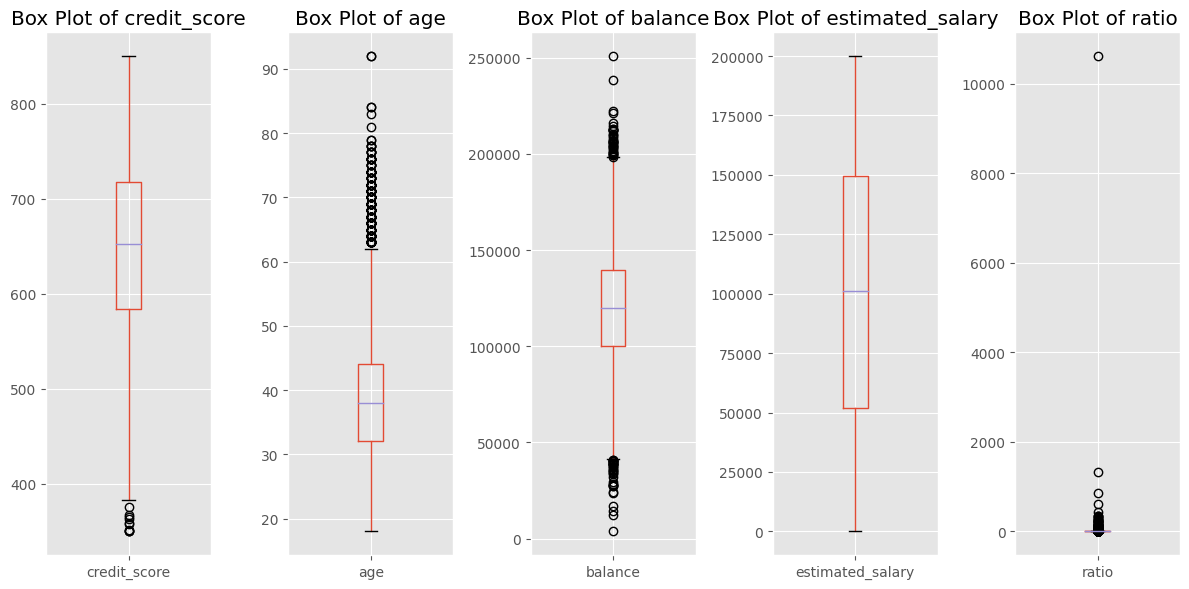

Upper and Lower Cutoffs for Outlier Detection:
Feature: credit_score, Lower Cutoff: 383.0, Upper Cutoff: 919.0
Feature: age, Lower Cutoff: 14.0, Upper Cutoff: 62.0
Feature: balance, Lower Cutoff: 41186.5025, Upper Cutoff: 198507.7625
Feature: estimated_salary, Lower Cutoff: -95052.79749999996, Upper Cutoff: 296386.26249999995
Feature: ratio, Lower Cutoff: -1.5362993755135645, Upper Cutoff: 4.652567502857474


In [ ]:
features = ['credit_score', 'age', 'balance','estimated_salary','ratio']

# Plot box plots for each feature
plt.figure(figsize=(12, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    df.boxplot(column=feature)
    plt.title('Box Plot of {}'.format(feature))

plt.tight_layout()
plt.show()

cutoffs = {}
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_cutoff = Q1 - 1.5 * IQR
    upper_cutoff = Q3 + 1.5 * IQR
    cutoffs[feature] = (lower_cutoff, upper_cutoff)

print("Upper and Lower Cutoffs for Outlier Detection:")
for feature, (lower, upper) in cutoffs.items():
    print("Feature: {}, Lower Cutoff: {}, Upper Cutoff: {}".format(feature, lower, upper))

# Remove rows containing outliers based on the cutoffs
for feature, (lower, upper) in cutoffs.items():
    df = df[(df[feature] >= lower) & (df[feature] <= upper)]



In [ ]:
df.shape

(5346, 16)

# **10. Feature Scaling**

Scaled continuous variables to values with mean 0 and std dev 1 using standard scaler

In [ ]:
# Scaling

scaler = StandardScaler()
scale = ['credit_score', 'age', 'tenure','balance','estimated_salary']

df_scaled = df.copy()
df_scaled[scale] = scaler.fit_transform(df[scale])

df_scaled

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male,Credit_Category,ratio
1,-0.455093,0.326331,-1.372995,-1.219407,1,0,1,0.001147,0,0,0,1,1,0,Bad,0.744677
2,-1.557599,0.439167,1.030870,1.427377,3,1,0,0.028605,1,1,0,0,1,0,Bad,1.401375
4,2.061948,0.552004,-1.029586,0.235760,1,1,1,-0.660251,0,0,0,1,1,0,Good,1.587055
5,-0.070256,0.664840,1.030870,-0.174416,2,1,0,0.736786,1,0,0,1,0,1,Bad,0.759604
8,-1.568000,0.664840,-0.342767,0.812910,2,0,1,-0.742160,0,1,0,0,0,1,Bad,1.895518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.075358,-0.237851,0.344052,0.177511,2,1,0,-0.309395,0,1,0,0,0,1,Fair,1.278918
9991,-0.569504,1.680368,-0.342767,-1.059826,1,1,0,-0.851985,1,1,0,0,1,0,Bad,1.273785
9996,-1.411985,-0.350688,1.717689,-2.141934,1,1,1,-0.213190,0,1,0,0,0,1,Bad,0.564108
9998,1.250670,0.439167,-0.686176,-1.524118,2,1,0,-0.387369,1,0,1,0,0,1,Good,0.808230


# **11. Data Validation**

In [ ]:
# DATA VALIDATION
df.info()
df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5346 entries, 1 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      5346 non-null   int64   
 1   age               5346 non-null   int64   
 2   tenure            5346 non-null   float64 
 3   balance           5346 non-null   float64 
 4   products_number   5346 non-null   int64   
 5   credit_card       5346 non-null   int64   
 6   active_member     5346 non-null   int64   
 7   estimated_salary  5346 non-null   float64 
 8   churn             5346 non-null   int64   
 9   France            5346 non-null   uint8   
 10  Germany           5346 non-null   uint8   
 11  Spain             5346 non-null   uint8   
 12  Female            5346 non-null   uint8   
 13  Male              5346 non-null   uint8   
 14  Credit_Category   5346 non-null   category
 15  ratio             5346 non-null   float64 
dtypes: category(1), float64(

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male,Credit_Category,ratio
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0,Bad,0.744677
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0,Bad,1.401375
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0,Good,1.587055
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,0,1,0,1,Bad,0.759604
8,501,44,4.0,142051.07,2,0,1,74940.50,0,1,0,0,0,1,Bad,1.895518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,659,36,6.0,123841.49,2,1,0,96833.00,0,1,0,0,0,1,Fair,1.278918
9991,597,53,4.0,88381.21,1,1,0,69384.71,1,1,0,0,1,0,Bad,1.273785
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0,0,1,Bad,0.564108
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,0,1,0,0,1,Good,0.808230


---

# **EDA**

---



# **1. Descriptive Analysis**

In [ ]:
df.describe()


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male,ratio
count,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000
mean,651.754770,38.107931,4.998129,118754.272656,1.393378,0.701833,0.503928,112484.536798,0.234568,0.410774,0.393378,0.195847,0.453984,0.546016,1.397335
std,96.153642,8.863213,2.912249,28661.205470,0.577684,0.457496,0.500031,50592.252641,0.423768,0.492020,0.488545,0.396889,0.497925,0.497925,0.928310
min,383.000000,18.000000,0.000000,41299.030000,1.000000,0.000000,0.000000,10771.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233136
25%,585.000000,32.000000,2.000000,99623.222500,1.000000,0.000000,0.000000,69018.602500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.751528
50%,652.000000,37.000000,5.000000,118820.765000,1.000000,1.000000,1.000000,112797.645000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.064284
75%,718.000000,43.000000,8.000000,137995.295000,2.000000,1.000000,1.000000,156175.555000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.735235
max,850.000000,62.000000,10.000000,198113.860000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.648283


# **2. Numerical Features Distribution**

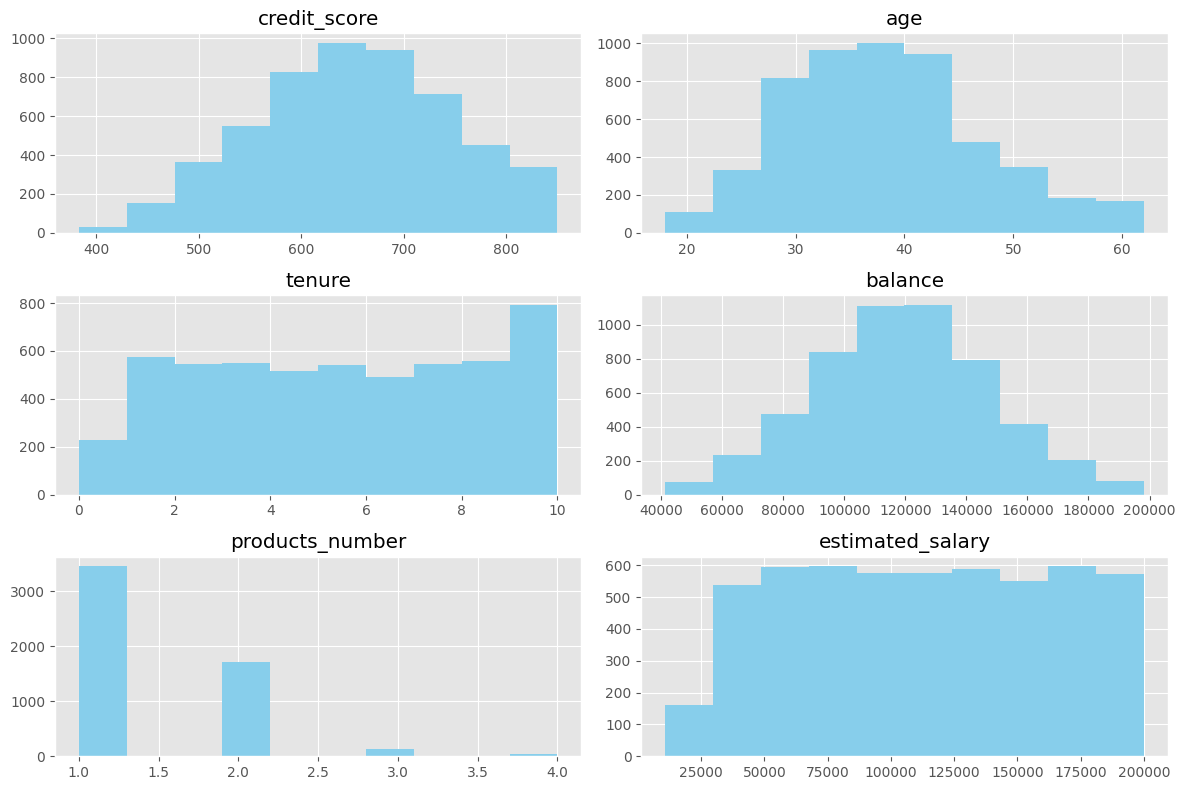

In [ ]:
df[['credit_score','age', 'tenure', 'balance', 'products_number', 'estimated_salary']].hist(figsize=(12, 8),color = 'skyblue')
plt.tight_layout()
plt.show()

# **3. Categorical Variables Distribution**

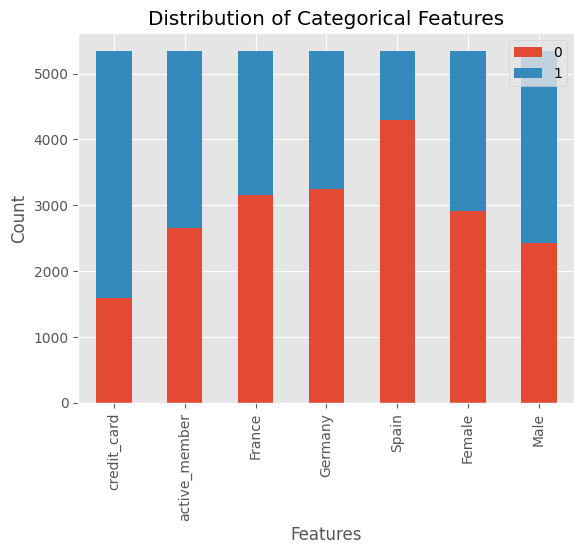

In [ ]:
df[['credit_card', 'active_member', 'France', 'Germany', 'Spain', 'Female', 'Male']].apply(lambda x: x.value_counts()).T.plot(kind='bar', stacked=True)
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Distribution of Categorical Features')
plt.show()

# **4. Target Variable Analysis**

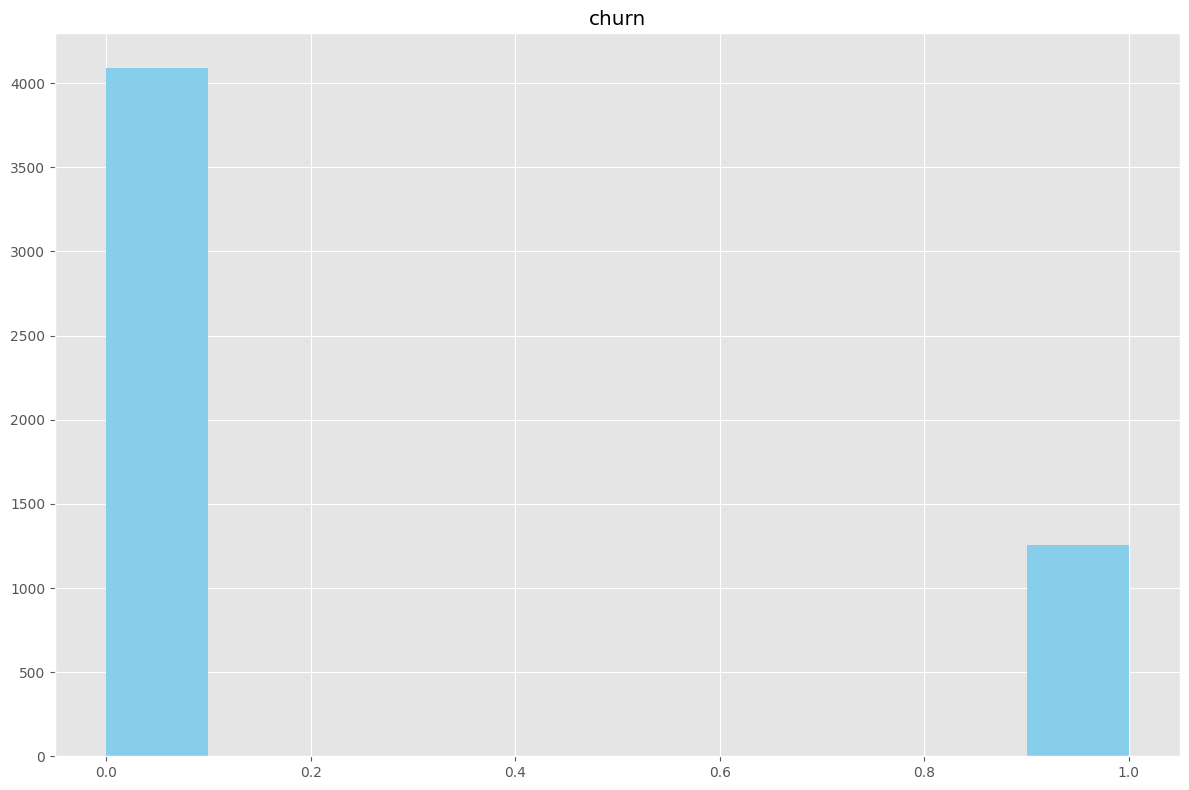

In [ ]:
df[['churn']].hist(figsize=(12, 8),color = 'skyblue')
plt.tight_layout()
plt.show()

# **5. Correlation Plots**

<ipython-input-19-1ae4b20bf7ce>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Pairwise Correlation Heatmap')

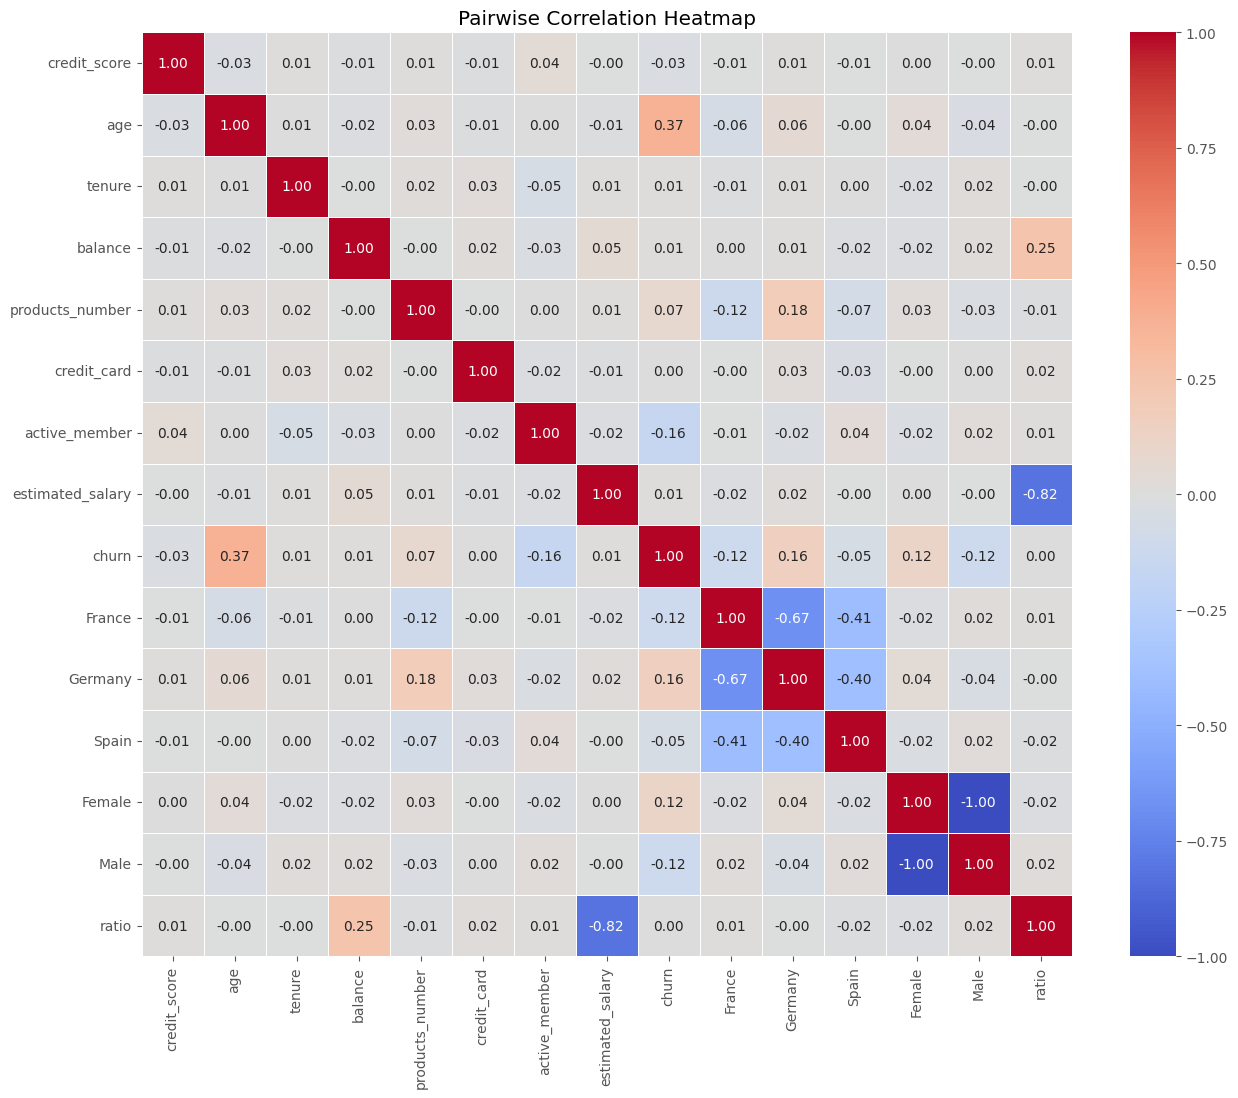

In [ ]:
# Pairwise Correlation heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')


<ipython-input-20-f8bfdf74c1a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_churn = df.corr()['churn'].drop('churn')


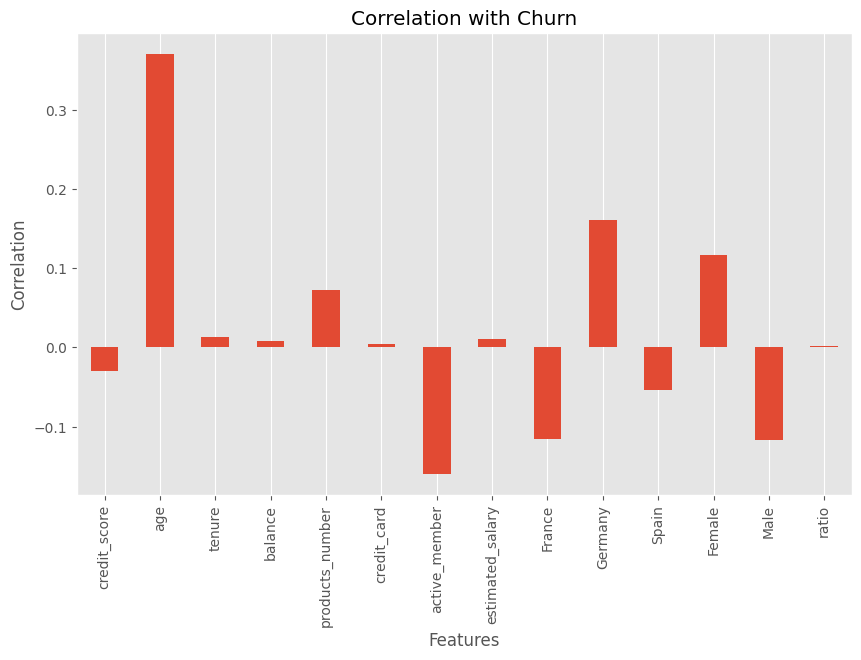

In [ ]:
correlation_with_churn = df.corr()['churn'].drop('churn')

plt.figure(figsize=(10, 6))
correlation_with_churn.plot(kind='bar')
plt.title('Correlation with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.grid(axis='y')
plt.show()

# **6. Churn distribution by Age Group**

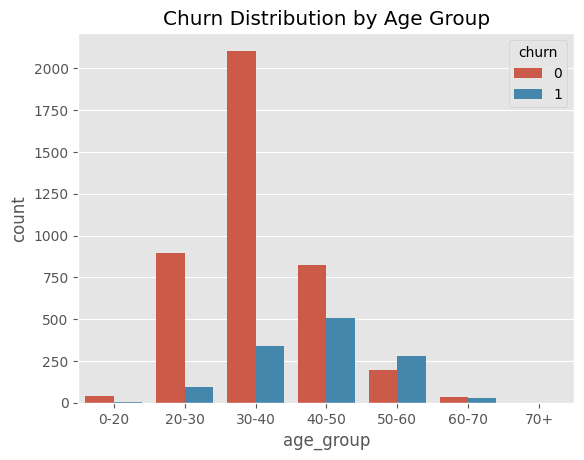

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, float('inf')], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])
sns.countplot(data=df, x='age_group', hue='churn')
plt.title('Churn Distribution by Age Group')
plt.show()

# **7. Credit Category by Age**

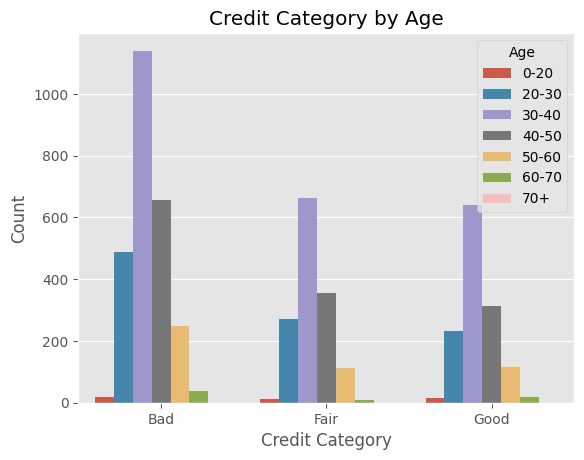

In [ ]:
sns.countplot(data=df, x='Credit_Category', hue='age_group')
plt.title('Credit Category by Age')
plt.xlabel('Credit Category')
plt.ylabel('Count')
plt.legend(title='Age')
plt.show()

# **8. Churn Distribution by Gender**

<ipython-input-23-dccd39932f4f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Female','Male'])


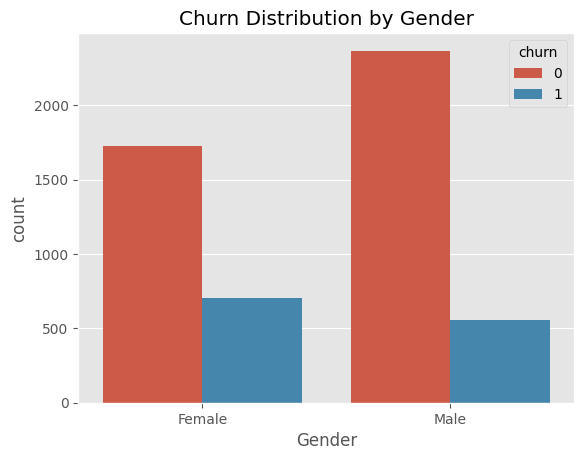

In [ ]:
sns.countplot(data=df, x='Male', hue='churn')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.gca().set_xticklabels(['Female','Male'])
plt.show()

# **9. Churn Distribution by Country**

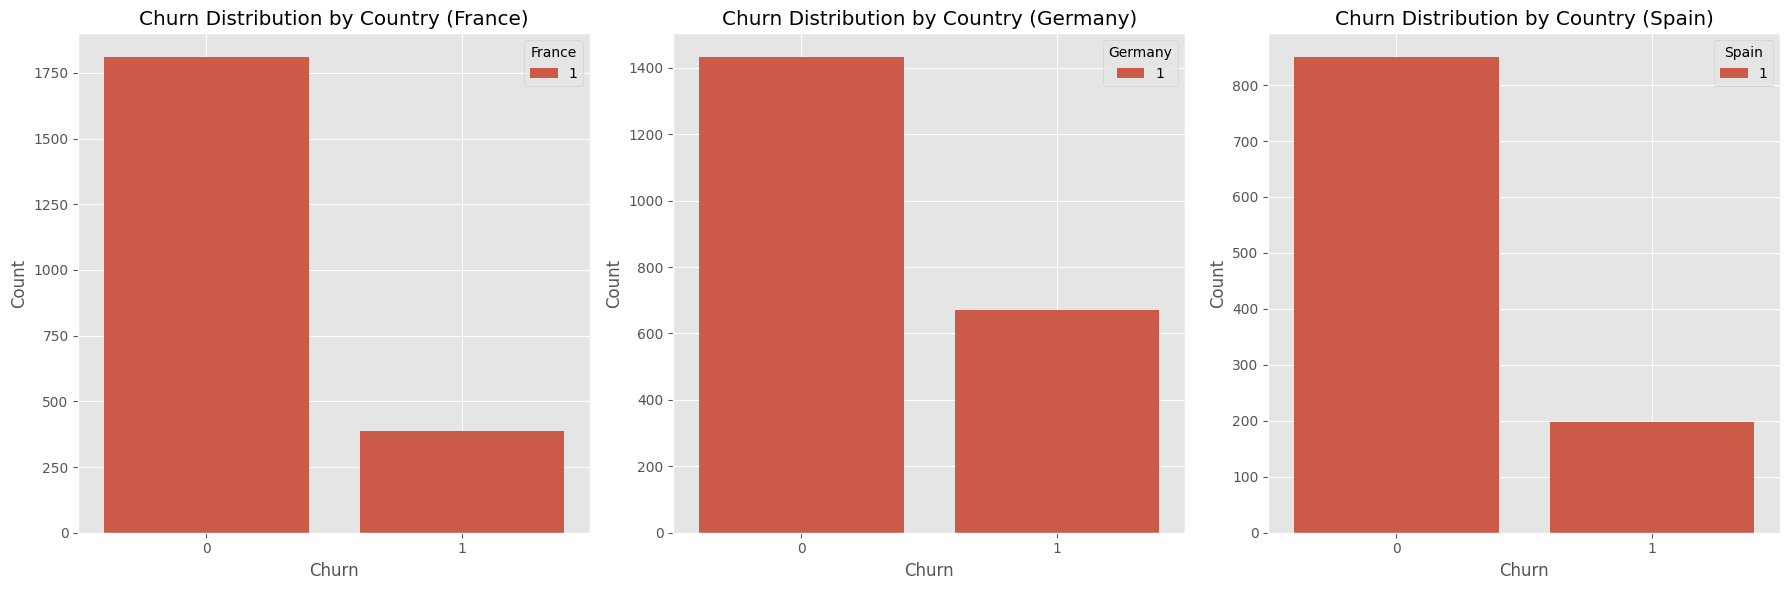

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
df_France = df[df['France'] == 1]
df_Germany = df[df['Germany'] == 1]
df_Spain = df[df['Spain'] == 1]

# Plot countplots for each country
sns.countplot(data=df_France, x='churn', hue='France', ax=axes[0])
axes[0].set_title('Churn Distribution by Country (France)')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].legend(title='France')
axes[0].grid(True)

sns.countplot(data=df_Germany, x='churn', hue='Germany', ax=axes[1])
axes[1].set_title('Churn Distribution by Country (Germany)')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')
axes[1].legend(title='Germany')
axes[1].grid(True)

sns.countplot(data=df_Spain, x='churn', hue='Spain', ax=axes[2])
axes[2].set_title('Churn Distribution by Country (Spain)')
axes[2].set_xlabel('Churn')
axes[2].set_ylabel('Count')
axes[2].legend(title='Spain')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## **10. Tenure vs Churn Analysis**

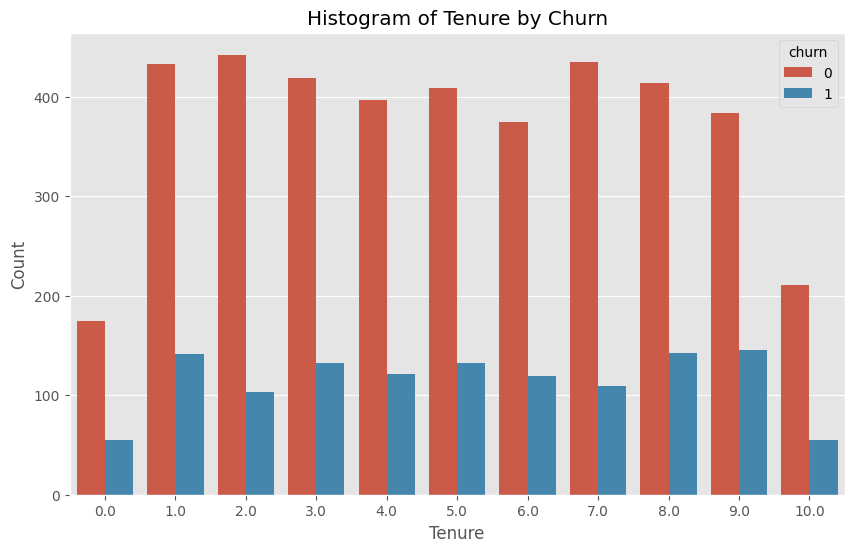

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tenure', hue='churn')
plt.title('Histogram of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

# **11. Number of Products vs Churn Analysis**

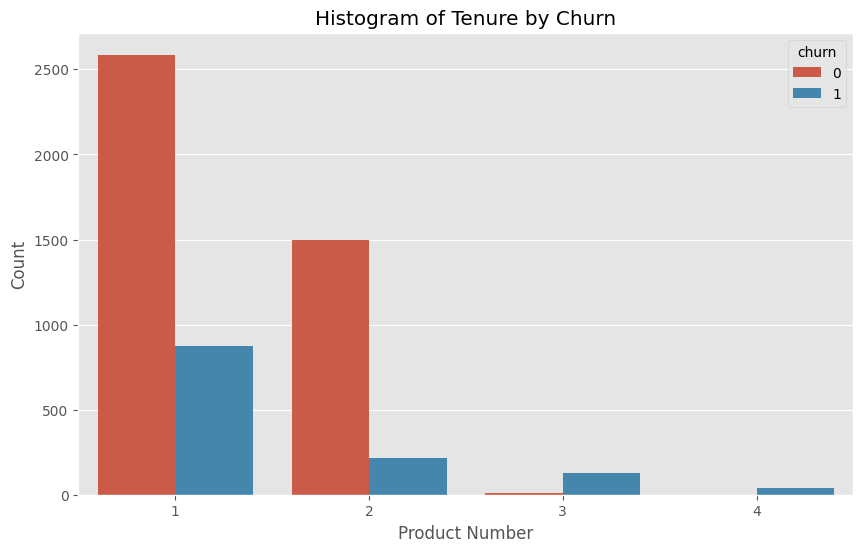

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='products_number', hue='churn')
plt.title('Histogram of Tenure by Churn')
plt.xlabel('Product Number')
plt.ylabel('Count')
plt.show()

# **12. Scatterplot of Ratio vs Credit Score**

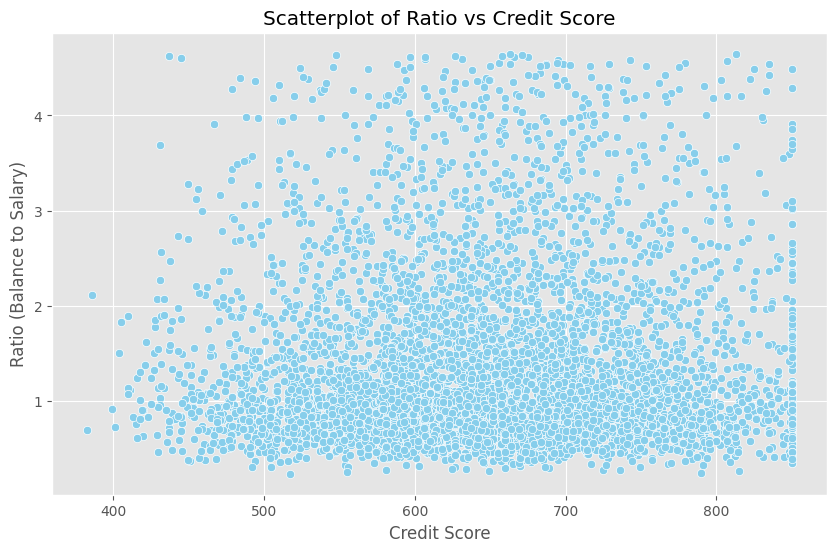

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='credit_score', y='ratio', color='skyblue')
plt.title('Scatterplot of Ratio vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Ratio (Balance to Salary)')
plt.grid(True)
plt.show()

# **13. Salary vs Credit Score**

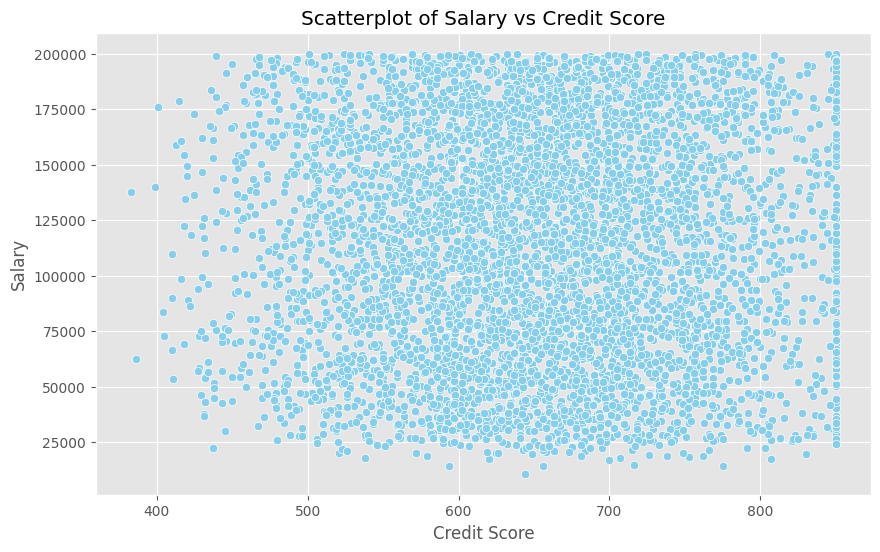

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='credit_score', y='estimated_salary', color='skyblue')
plt.title('Scatterplot of Salary vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# **14. Balance vs Credit Score**

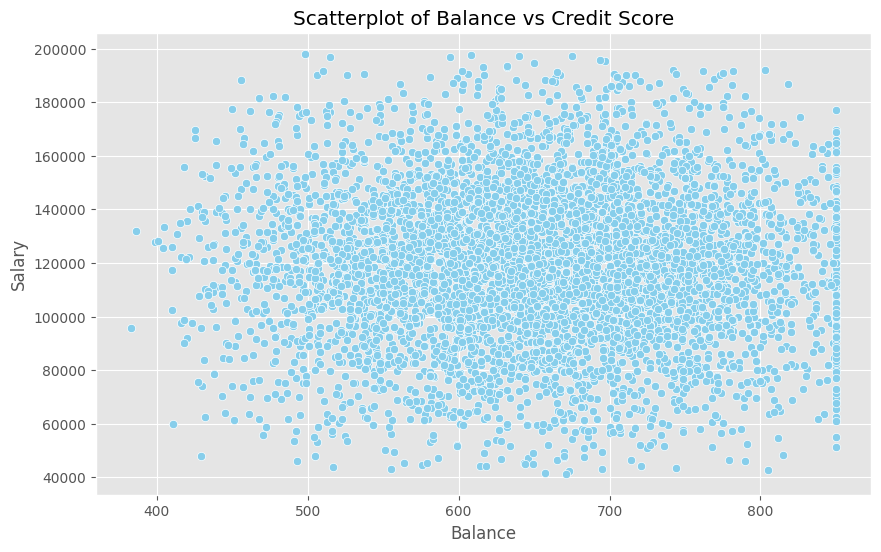

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='credit_score', y='balance', color='skyblue')
plt.title('Scatterplot of Balance vs Credit Score')
plt.xlabel('Balance')
plt.ylabel('Salary')
plt.grid(True)
plt.show()



---
# **Phase 2**
---


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score


df = df_scaled
df = df.drop(['Credit_Category','ratio'], axis = 1)
df
# df['churn'].sum()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male
1,-0.455093,0.326331,-1.372995,-1.219407,1,0,1,0.001147,0,0,0,1,1,0
2,-1.557599,0.439167,1.030870,1.427377,3,1,0,0.028605,1,1,0,0,1,0
4,2.061948,0.552004,-1.029586,0.235760,1,1,1,-0.660251,0,0,0,1,1,0
5,-0.070256,0.664840,1.030870,-0.174416,2,1,0,0.736786,1,0,0,1,0,1
8,-1.568000,0.664840,-0.342767,0.812910,2,0,1,-0.742160,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.075358,-0.237851,0.344052,0.177511,2,1,0,-0.309395,0,1,0,0,0,1
9991,-0.569504,1.680368,-0.342767,-1.059826,1,1,0,-0.851985,1,1,0,0,1,0
9996,-1.411985,-0.350688,1.717689,-2.141934,1,1,1,-0.213190,0,1,0,0,0,1
9998,1.250670,0.439167,-0.686176,-1.524118,2,1,0,-0.387369,1,0,1,0,0,1


# **1. Logistic Regression**

Accuracy: 0.7953271028037383
Precision: 0.626984126984127
Recall: 0.3147410358565737


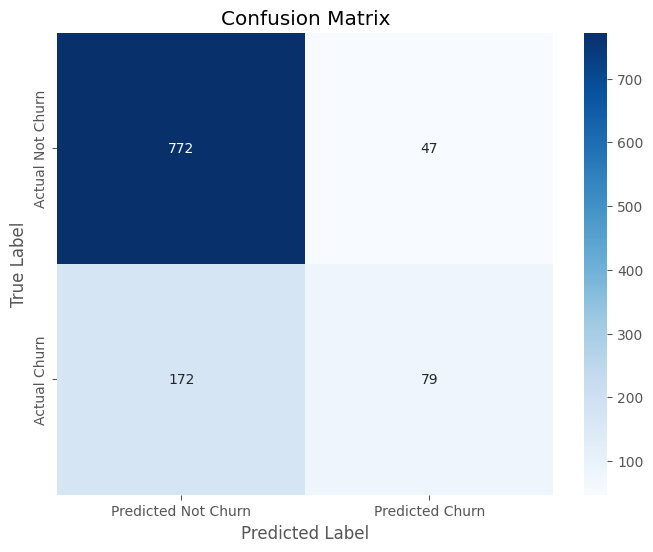

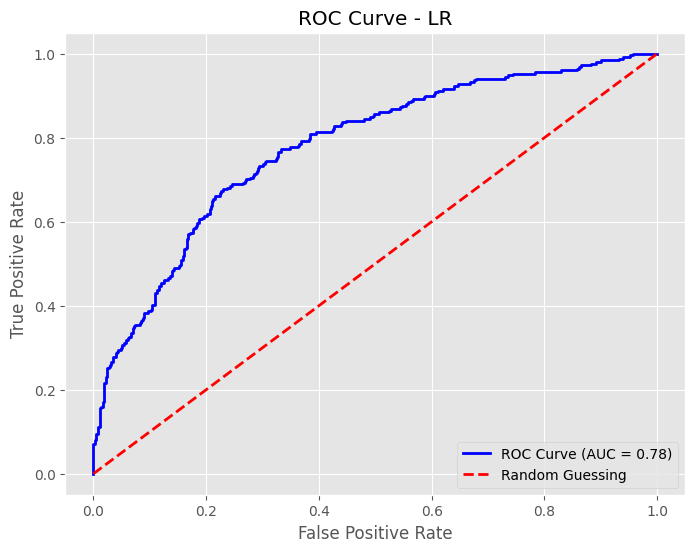

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Building the Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Calculating accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Actual Not Churn', 'Actual Churn'], columns=['Predicted Not Churn', 'Predicted Churn'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Creating ROC curve and calculating AUC
y_probs = log_reg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LR')
plt.legend(loc='lower right')
plt.show()

# **2. Support Vector Machine**

SVC Accuracy: 0.8299065420560747
SVC Precision: 0.7446808510638298
SVC Recall: 0.41832669322709165


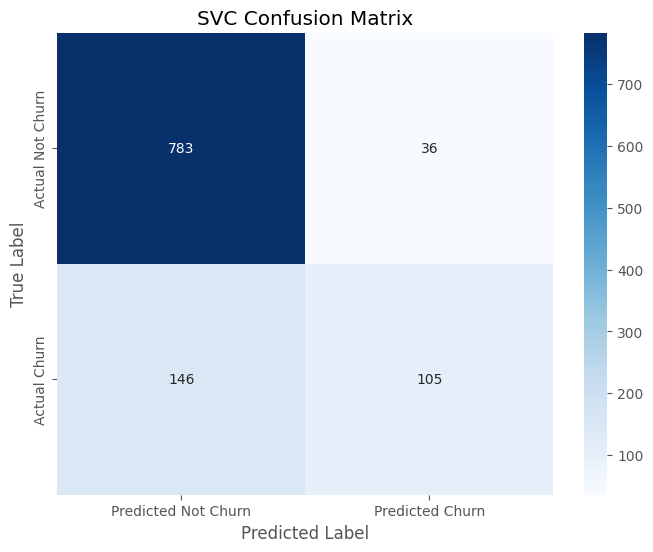

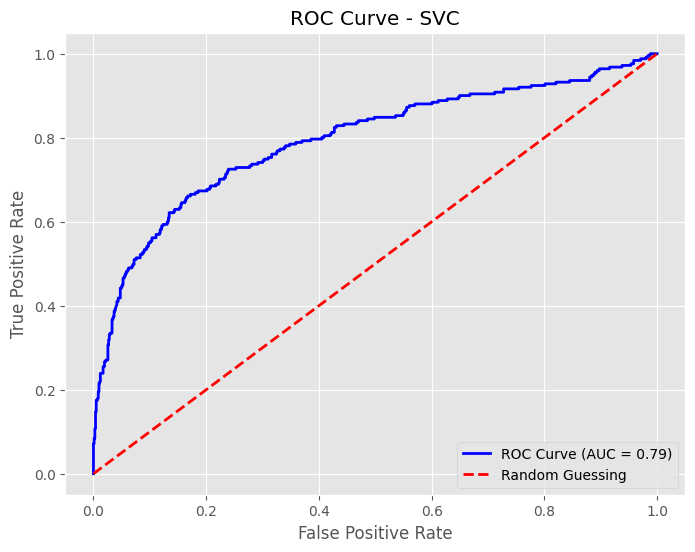

In [ ]:
# Building SVC Model
svc_model = SVC(kernel='rbf', C = 5, probability=True)
svc_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_svc = svc_model.predict(X_test)

# Calculating accuracy, precision, and recall
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)

print("SVC Accuracy:", accuracy_svc)
print("SVC Precision:", precision_svc)
print("SVC Recall:", recall_svc)

# Creating a confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
conf_df_svc = pd.DataFrame(conf_matrix_svc, index=['Actual Not Churn', 'Actual Churn'], columns=['Predicted Not Churn', 'Predicted Churn'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df_svc, annot=True, fmt='d', cmap='Blues')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Creating ROC curve and calculating AUC
y_probs_svc = svc_model.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_probs_svc)
auc_svc = roc_auc_score(y_test, y_probs_svc)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc_svc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend(loc='lower right')
plt.show()

# **3. KNN Classifier**

KNN Accuracy: 0.8084112149532711
KNN Precision: 0.73
KNN Recall: 0.2908366533864542


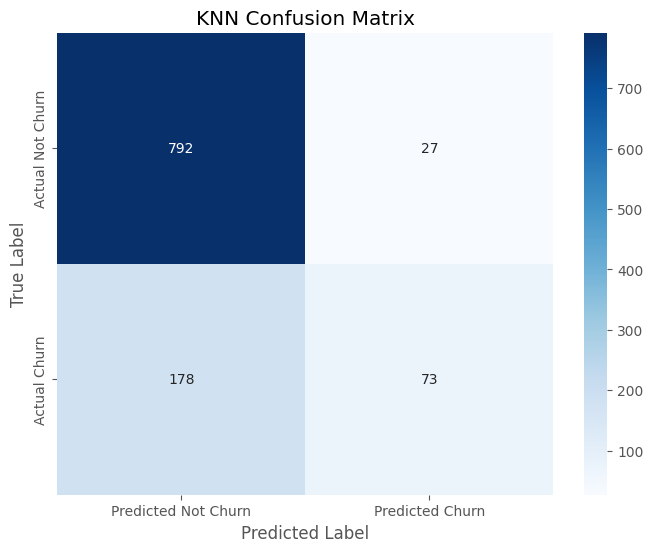

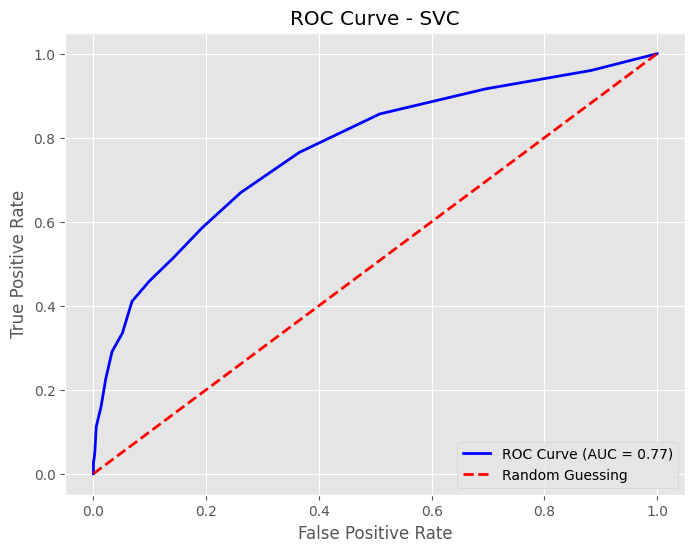

In [ ]:
# Building KNN Model
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculating accuracy, precision, and recall
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)

# Creating a confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_df_knn = pd.DataFrame(conf_matrix_knn, index=['Actual Not Churn', 'Actual Churn'], columns=['Predicted Not Churn', 'Predicted Churn'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Creating ROC curve and calculating AUC
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)
auc_knn = roc_auc_score(y_test, y_probs_knn)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc_knn))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend(loc='lower right')
plt.show()

# **4. Decision Tree**

Decision Tree Accuracy: 0.8252336448598131
Decision Tree Precision: 0.753968253968254
Decision Tree Recall: 0.3784860557768924


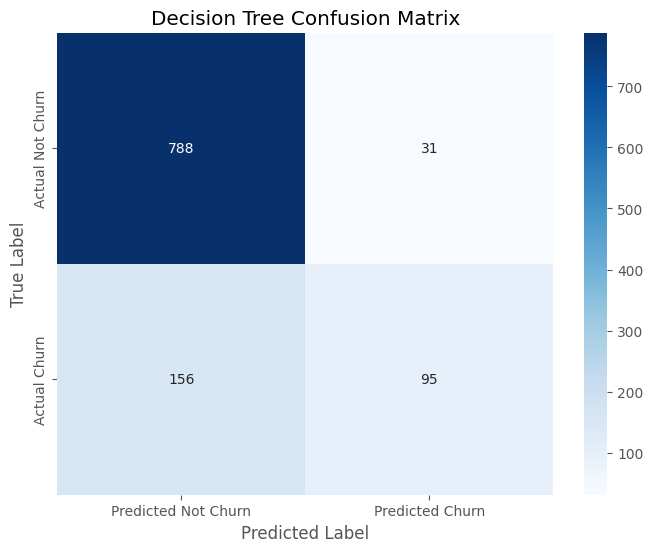

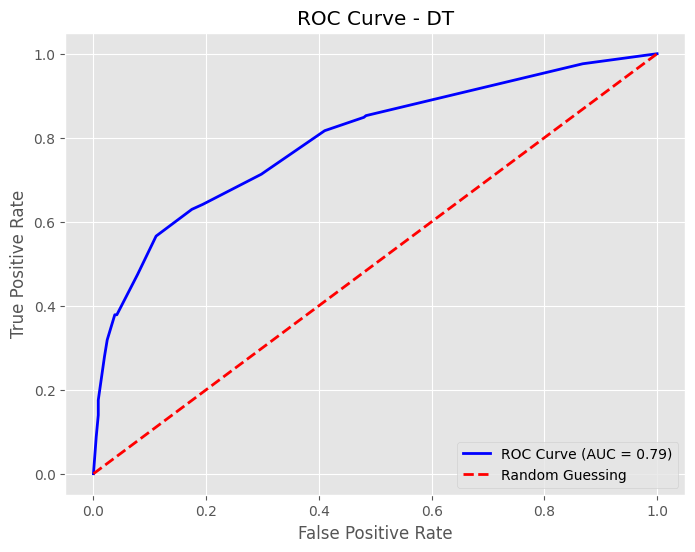

In [ ]:
# Building DT Model
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculating accuracy, precision, and recall
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)

# Creating a confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_df_dt = pd.DataFrame(conf_matrix_dt, index=['Actual Not Churn', 'Actual Churn'], columns=['Predicted Not Churn', 'Predicted Churn'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Creating ROC curve and calculating AUC
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)
auc_dt = roc_auc_score(y_test, y_probs_dt)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DT')
plt.legend(loc='lower right')
plt.show()

# **5. Random Forest**

Random Forest Accuracy: 0.8317757009345794
Random Forest Precision: 0.7232704402515723
Random Forest Recall: 0.4581673306772908


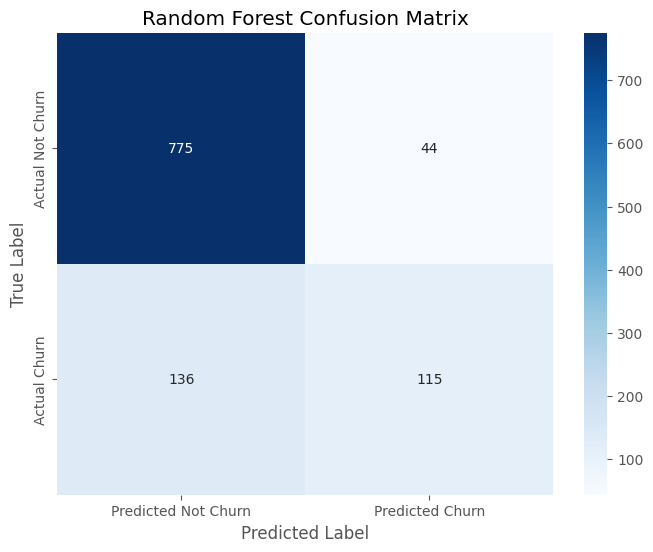

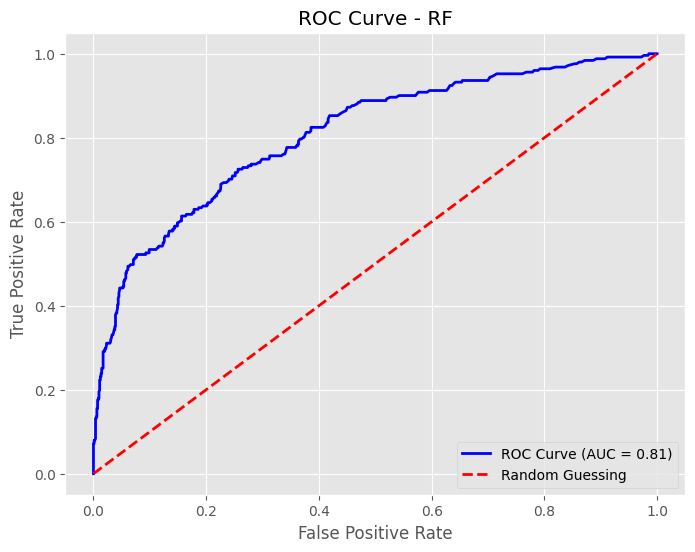

In [ ]:
# Building RF Model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculating accuracy, precision, and recall
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)

# Creating a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_df_rf = pd.DataFrame(conf_matrix_rf, index=['Actual Not Churn', 'Actual Churn'], columns=['Predicted Not Churn', 'Predicted Churn'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Creating ROC curve and calculating AUC
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RF')
plt.legend(loc='lower right')
plt.show()

# **6. XGboost Classifier**

XGBoost Accuracy: 0.8018691588785046
XGBoost Precision: 0.6077348066298343
XGBoost Recall: 0.43824701195219123


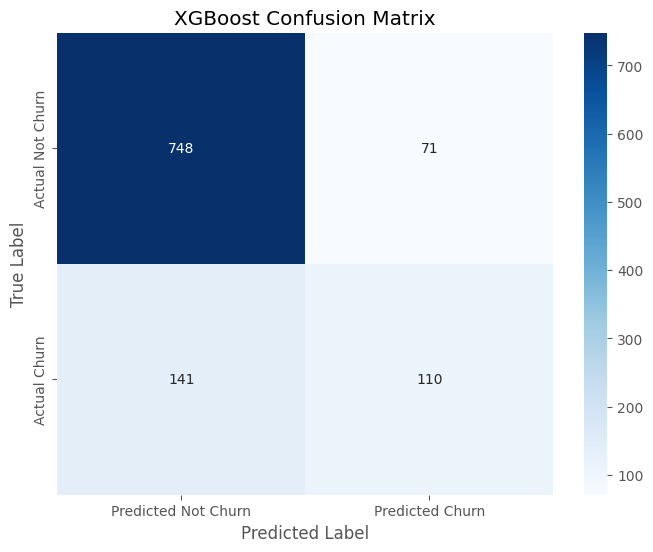

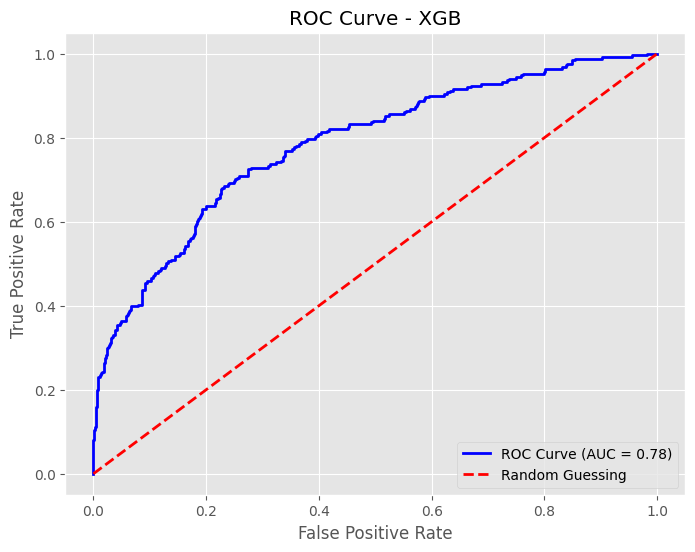

In [ ]:
# Building XGB Model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculating accuracy, precision, and recall
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)

# Creating a confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_df_xgb = pd.DataFrame(conf_matrix_xgb, index=['Actual Not Churn', 'Actual Churn'], columns=['Predicted Not Churn', 'Predicted Churn'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Creating ROC curve and calculating AUC
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb)
auc_xgb = roc_auc_score(y_test, y_probs_xgb)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc_xgb))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGB')
plt.legend(loc='lower right')
plt.show()

# **7. Naive Bayes**

Naive Bayes Accuracy: 0.791588785046729
Naive Bayes Precision: 0.5853658536585366
Naive Bayes Recall: 0.38247011952191234


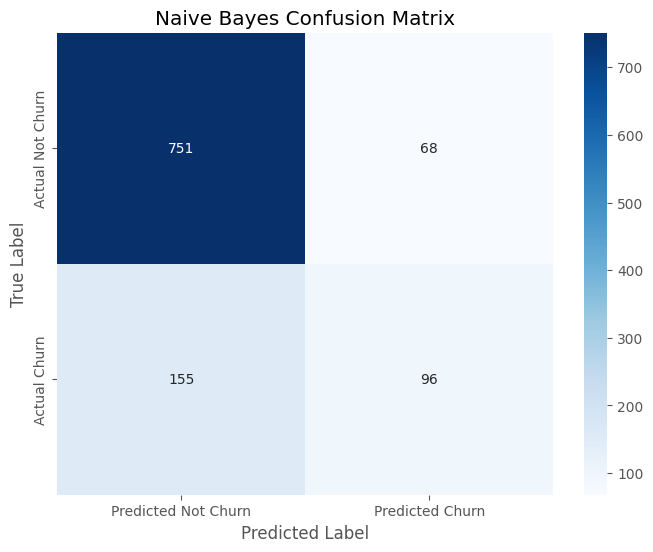

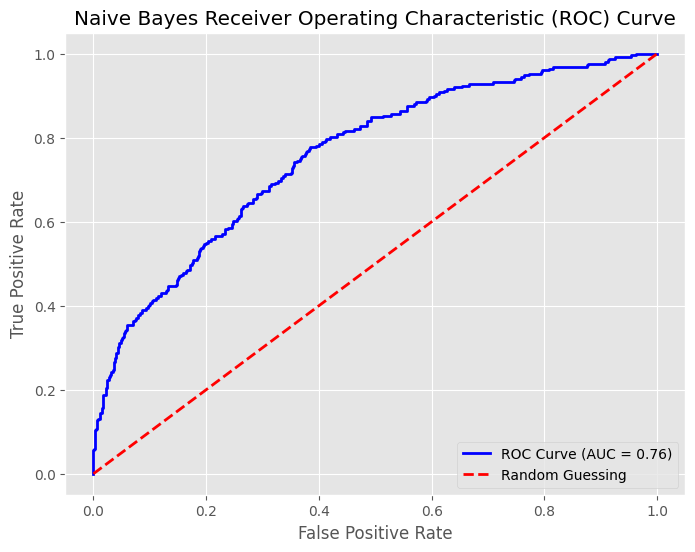

In [ ]:
# Building NB Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Calculating accuracy, precision, and recall
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Precision:", precision_nb)
print("Naive Bayes Recall:", recall_nb)

# Creating a confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_df_nb = pd.DataFrame(conf_matrix_nb, index=['Actual Not Churn', 'Actual Churn'], columns=['Predicted Not Churn', 'Predicted Churn'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Creating ROC curve and calculating AUC
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb)
auc_nb = roc_auc_score(y_test, y_probs_nb)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc_nb))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **References**
Phase 1
* Dataset - https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
* https://pandas.pydata.org/docs/getting_started/index.html#getting-started
* https://github.com/AlexTheAnalyst/PandasYouTubeSeries/blob/main/Pandas%20101%20-%20Data%20Cleaning%20in%20Pandas.ipynb
* Book - Joel Grus. Data Science from Scratch (First Principles with Python), O’Reilly, 2015.
* C. O’Neill and R. Schutt. Doing Data Science (Straight Talk from the Frontline) , O’Reilly, 2013.
* NIST on EDA, https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm
* John Tukey Biography, https://mathshistory.st-andrews.ac.uk/Biographies/Tukey/
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

Phase 2
 * https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
 * https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
 * https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d
